## <font color=Red>Advertising Sales Channel Prediction</font>

### Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Reading data frame and understanding data

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.sample()

,Unnamed: 0,TV,radio,newspaper,sales
134,135,36.9,38.6,65.6,10.8


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### There is huge spending on TV advertisement and minimum on radio

# Data Inspection

In [12]:
df.shape

(200, 4)

In [13]:
duplicated_values = df.duplicated()
print(duplicated_values.sum())

0


In [14]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

## Exploratory Data Anaylysis (Data Cleaning)

## Univariate analysis

### Scatterplot

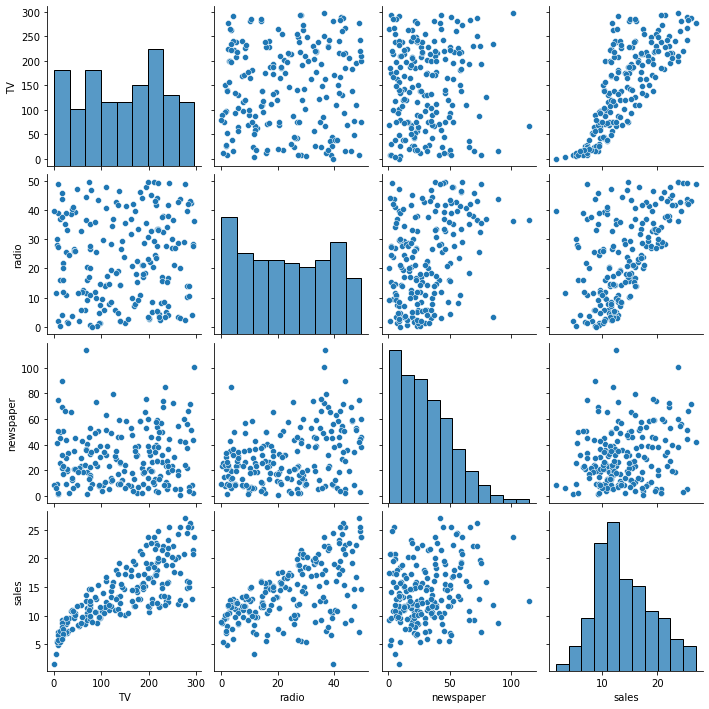

In [15]:
sns.pairplot(df)

## Observations:


#### From above results it is clear that few of the independant variables have positive relationship with target variable

## Checking null values

In [16]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [17]:
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 0


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Univariate analysis

### Data distribtion and understanding skewness from bar plots

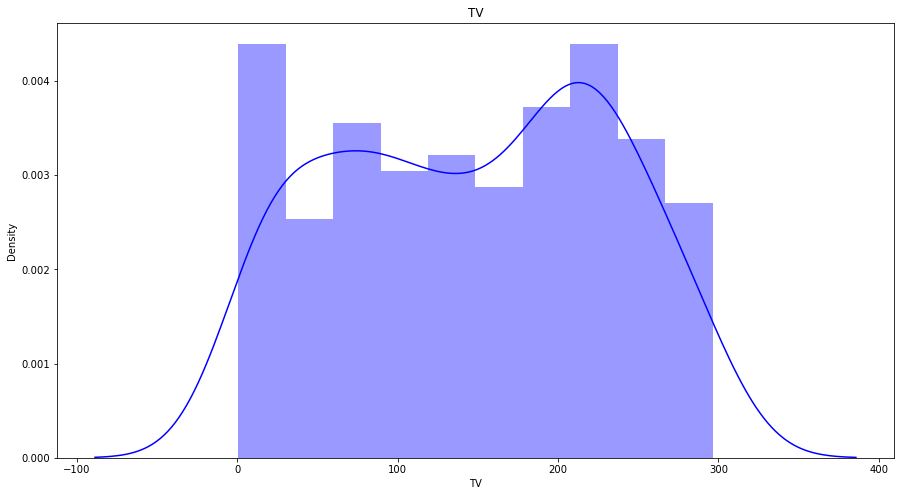

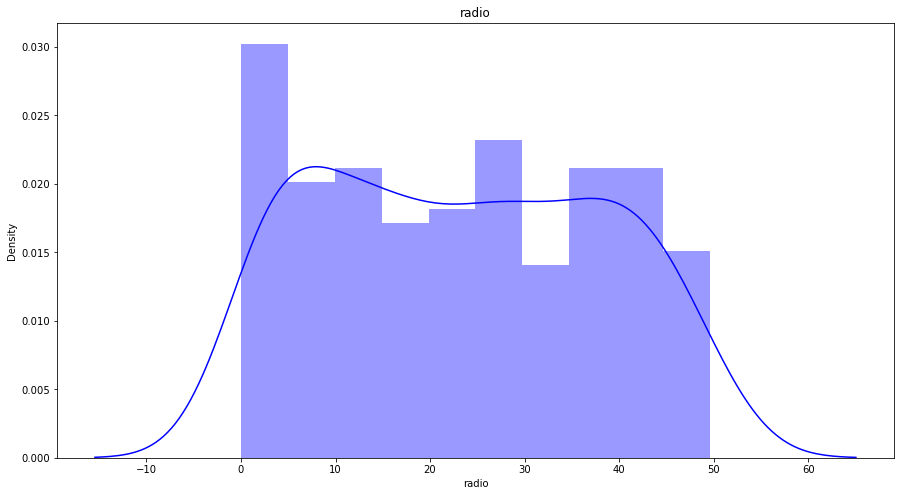

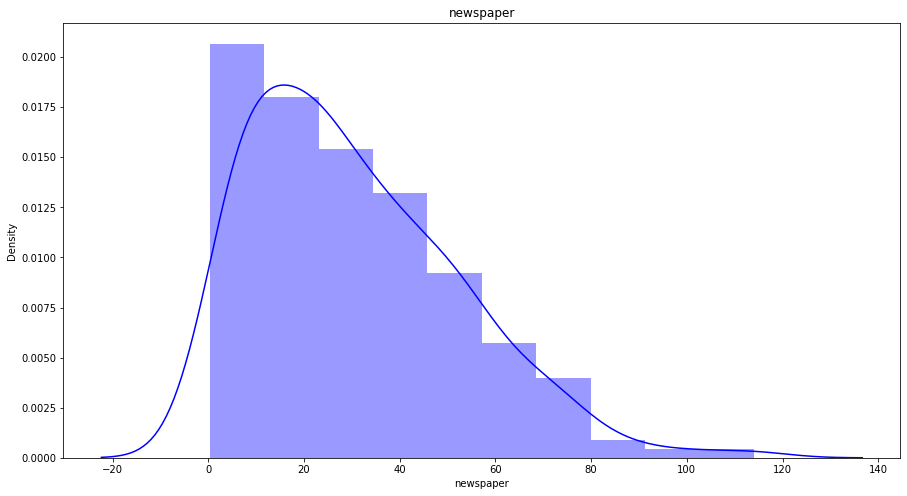

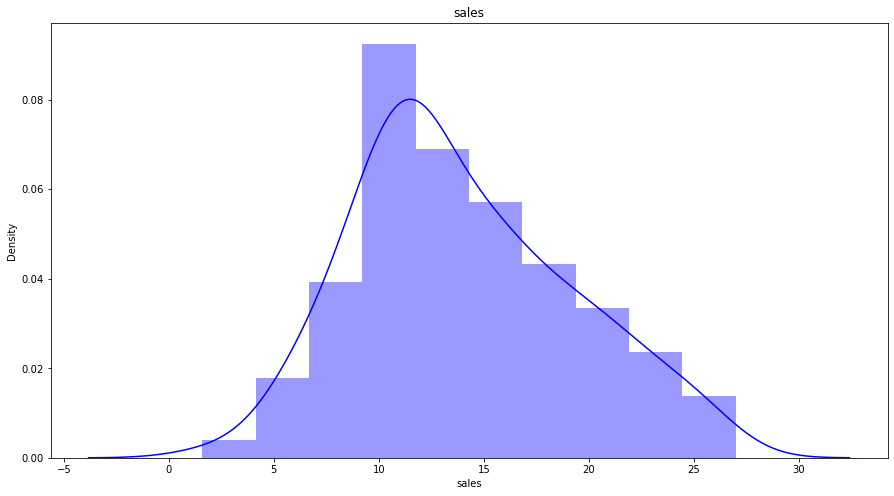

In [19]:
for i in df.columns[0:]:                                 
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10,color='b')
    plt.title(i)
    plt.show()

In [20]:
df.skew() #Checking skewness of the data

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observations from graphs:

The TV and radio graphs are more evenly spread

The newspaper graph experiences a steep decline, implying not much money is spent on advertising through newspaper

The sales graph is bell shaped

<AxesSubplot:>

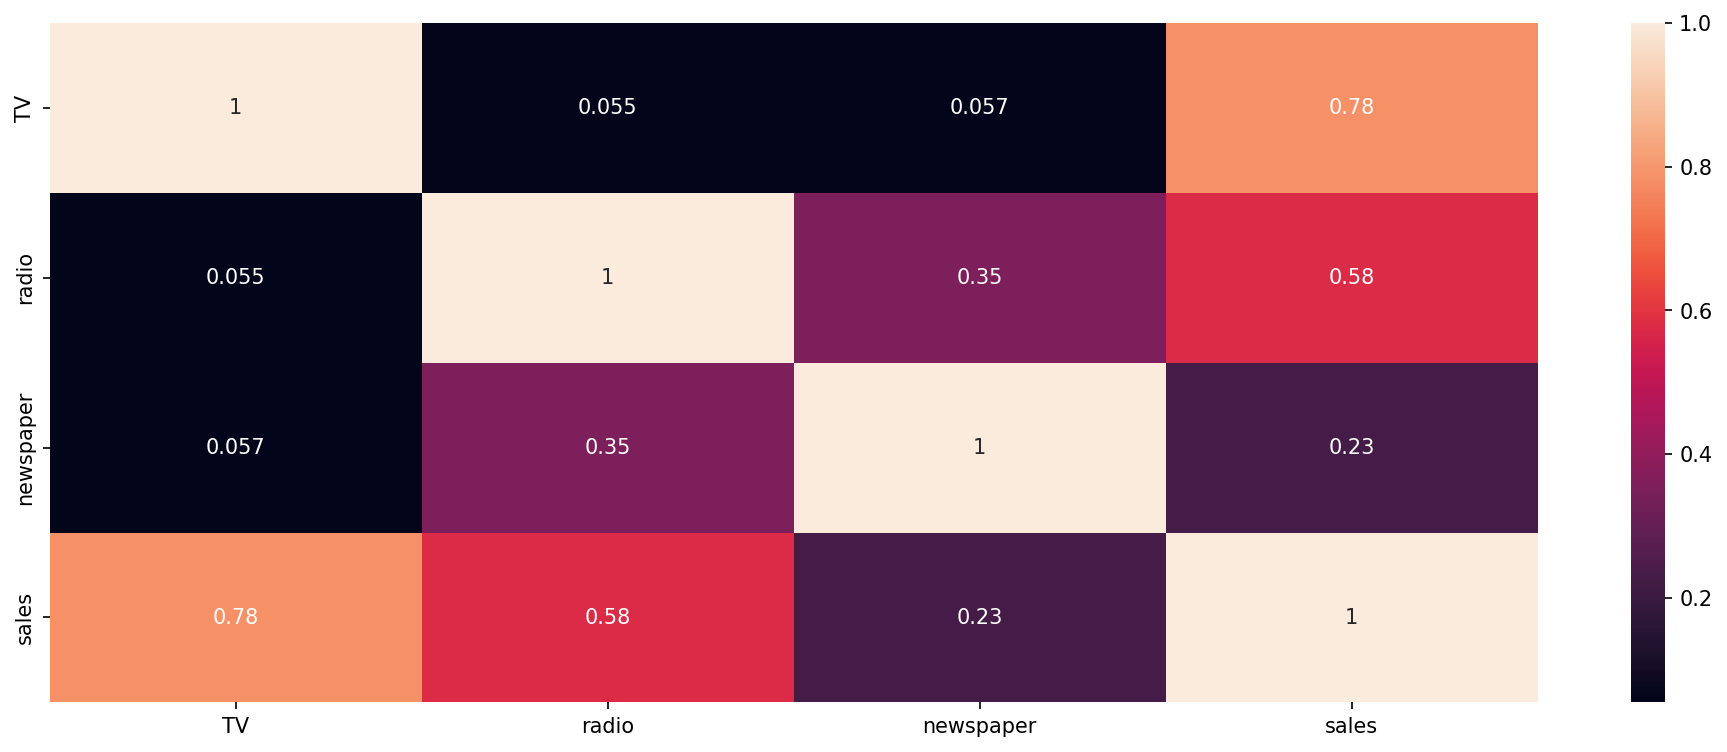

In [21]:
# Calculate correlations

plt.figure(figsize=(16,6), dpi=150)

#heatmap
sns.heatmap(df.corr(), annot=True)

# Bivariate analysis

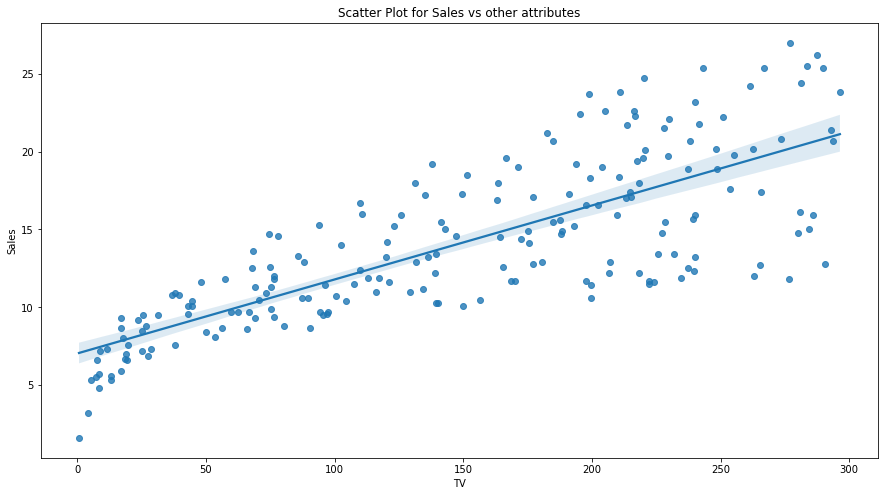

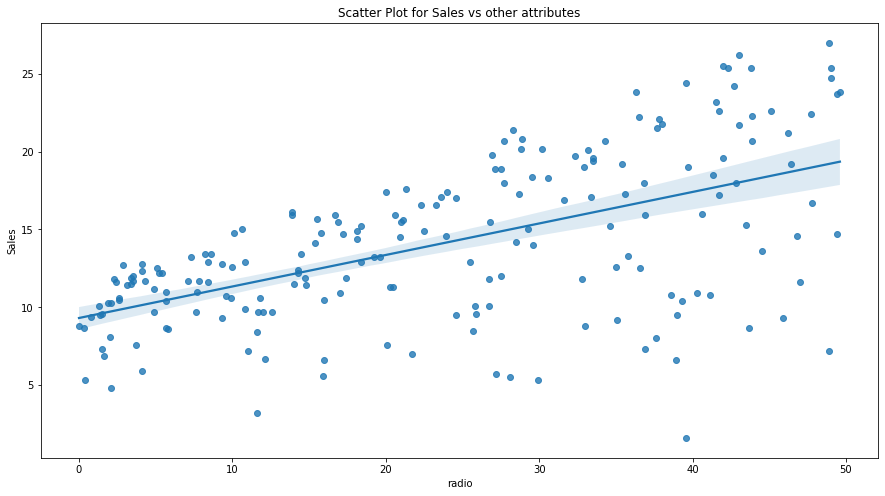

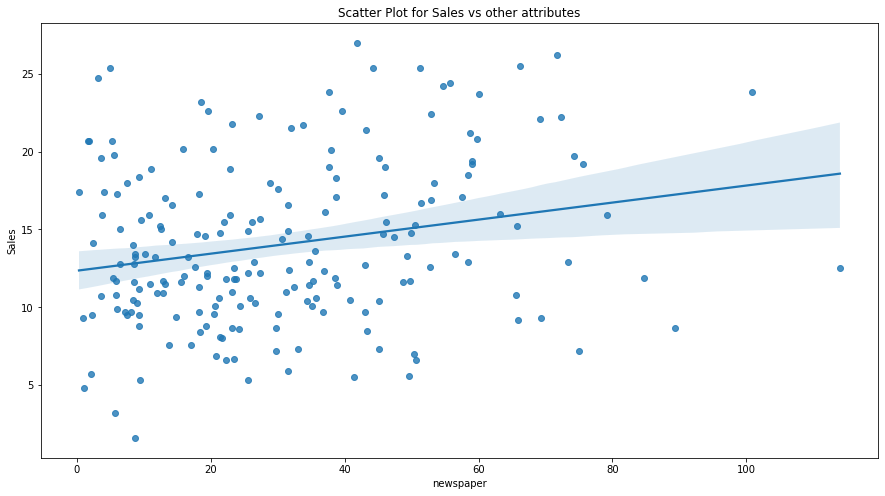

In [22]:
for i in df.columns[0:-1]:                                          
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['sales'])
    plt.title('Scatter Plot for Sales vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.show()

 Observations from the graphs:

There is a linear relation between TV and sales

There is somewhat linear relation between radio and sales but the graph is more spread

There doesn't seem to be a linear relation between sales and newspaper as graph is very spread.

Observations from heatmap:

As we can see from the heatmap, TV has highest correlation with sales with 0.78.

Radio is also highly correlated with sales with 0.58.

Newspaper has the lowest correlation with sales at 0.23, less than half the correlation sales have with radio.

TV has very low correlation with other two columns (radio and newspaper) at 0.055 and 0.057 respectively.

# Outliers 

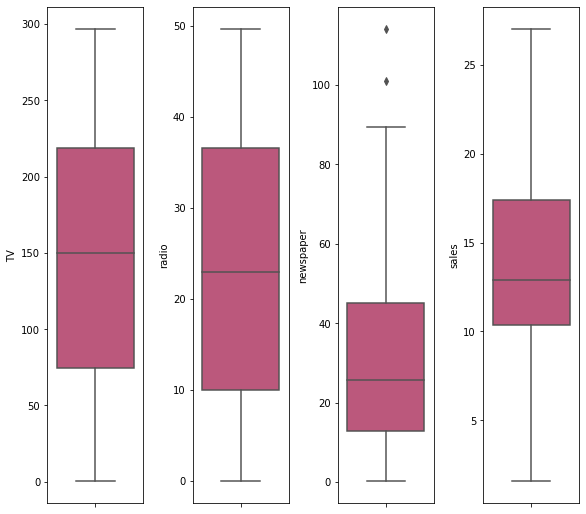

In [23]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(8,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

There are no outliers in TV and radio.

As for newspaper there are only 2 outliers which can be ignored.

As the dataset is very small, we must avoid removing values from the dataset.

In [24]:
df.skew()


TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Only newspaper has skewness higher than threshold value of 0.5.

Skewness treated with log transformation.

In [25]:
df['newspaper'] = np.log(df['newspaper'])

## Variance Infilation Factor

In [26]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)


In [28]:
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.196610,1.552053
1,1.197376,1.082808,0.755408,0.696046
2,1.516155,1.528463,1.198098,0.907406
3,0.052050,1.217855,1.023503,0.860330
4,0.394182,0.841614,1.021740,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.464996,1.234053
196,0.617035,1.240003,1.014083,0.830548
197,0.349810,0.942899,1.256848,0.234898
198,1.594565,1.265121,1.150935,2.205347


In [29]:
threshold=3
print(np.where(z>3))

(array([ 8, 33, 65], dtype=int64), array([2, 2, 2], dtype=int64))


In [30]:
z.iloc[]

SyntaxError: invalid syntax (Temp/ipykernel_4792/1756217840.py, line 1)

In [31]:
z.shape

(200, 4)

In [32]:
len(np.where(z>3)[0])

3

In [33]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (200, 4)
New Dataframe (197, 4)
total_dropped_rows 3


# Percentage data loss:

In [34]:
loss_percent=(200-198)/200*100
print(loss_percent,'%')

1.0 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

3.04% data loss is acceptable.

Splitting the dataset into Features and Target

In [35]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [36]:
X

,TV,radio,newspaper
0,230.1,37.8,4.237001
1,44.5,39.3,3.808882
2,17.2,45.9,4.238445
3,151.5,41.3,4.069027
4,180.8,10.8,4.067316
...,...,...,...
195,38.2,3.7,2.624669
196,94.2,4.9,2.091864
197,177.0,9.3,1.856298
198,283.6,42.0,4.192680


In [37]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 197, dtype: float64

In [38]:
X.skew().sort_values()

newspaper   -0.760308
TV          -0.077750
radio        0.075119
dtype: float64

Observations:

Since the skewness is almost within permissible ranges and the outlier data are a real value we have proceeded with the X independant variables as it

## Scaling the independant variable (x) to get all the columns in a standard scale

In [39]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 9.69891914e-01,  9.68397632e-01,  1.26998788e+00],
       [-1.21047453e+00,  1.06968657e+00,  7.79118887e-01],
       [-1.53118576e+00,  1.51535788e+00,  1.27164358e+00],
       [ 4.65255202e-02,  1.20473848e+00,  1.07739340e+00],
       [ 3.90732077e-01, -8.54803205e-01,  1.07543177e+00],
       [-1.63104090e+00,  1.71793575e+00,  1.36227234e+00],
       [-1.05775490e+00,  6.30767848e-01,  3.16891701e-02],
       [-3.21176364e-01, -2.60574784e-01, -7.77785590e-01],
       [ 6.13937693e-01, -1.40851605e+00, -8.64069163e-02],
       [-9.56724989e-01, -1.19243299e+00,  6.53436066e-02],
       [ 7.88977887e-01,  3.65394265e-02, -1.99855355e+00],
       [-1.45365118e+00,  7.86077549e-01,  1.21396358e+00],
       [-5.87848338e-01, -1.07088627e+00, -1.32461357e+00],
       [ 6.64452649e-01,  6.37520443e-01,  8.01774183e-01],
       [ 5.62247971e-01,  1.63690461e+00,  9.62021370e-01],
       [-9.36753960e-01,  8.87366484e-01,  1.84235406e+00],
       [ 1.57254708e+00,  1.08994436e+00

In [40]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [41]:
x = pd.DataFrame(x1,columns=X.columns)

In [42]:
X

,TV,radio,newspaper
0,230.1,37.8,4.237001
1,44.5,39.3,3.808882
2,17.2,45.9,4.238445
3,151.5,41.3,4.069027
4,180.8,10.8,4.067316
...,...,...,...
195,38.2,3.7,2.624669
196,94.2,4.9,2.091864
197,177.0,9.3,1.856298
198,283.6,42.0,4.192680


# Machine Learning Models

dependent Variable is continuous values we will use Linear Regression model

In [43]:
lr = LinearRegression()

In [44]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [45]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [46]:
lr_acc = pd.DataFrame()

In [47]:
lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

In [48]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
187,188,0.88,0.95


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=111)

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
pred_test = lr.predict(x_test)

In [55]:
print(r2_score(y_test,pred_test))

0.9308514560867515


Cross Validation of the model

In [58]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8905384965396053
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 3 the cv score is 0.8896726737558588
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 4 the cv score is 0.888196043288129
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 5 the cv score is 0.8865340711347679
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 6 the cv score is 0.8864357051581581
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 7 the cv score is 0.8842538918275079
accuracy score for training is -1.0583792352388217
accuracy score for testing is 0.9308514560867515


At cross fold 8 the cv score is 0.8881003040866844
accuracy score for training is -

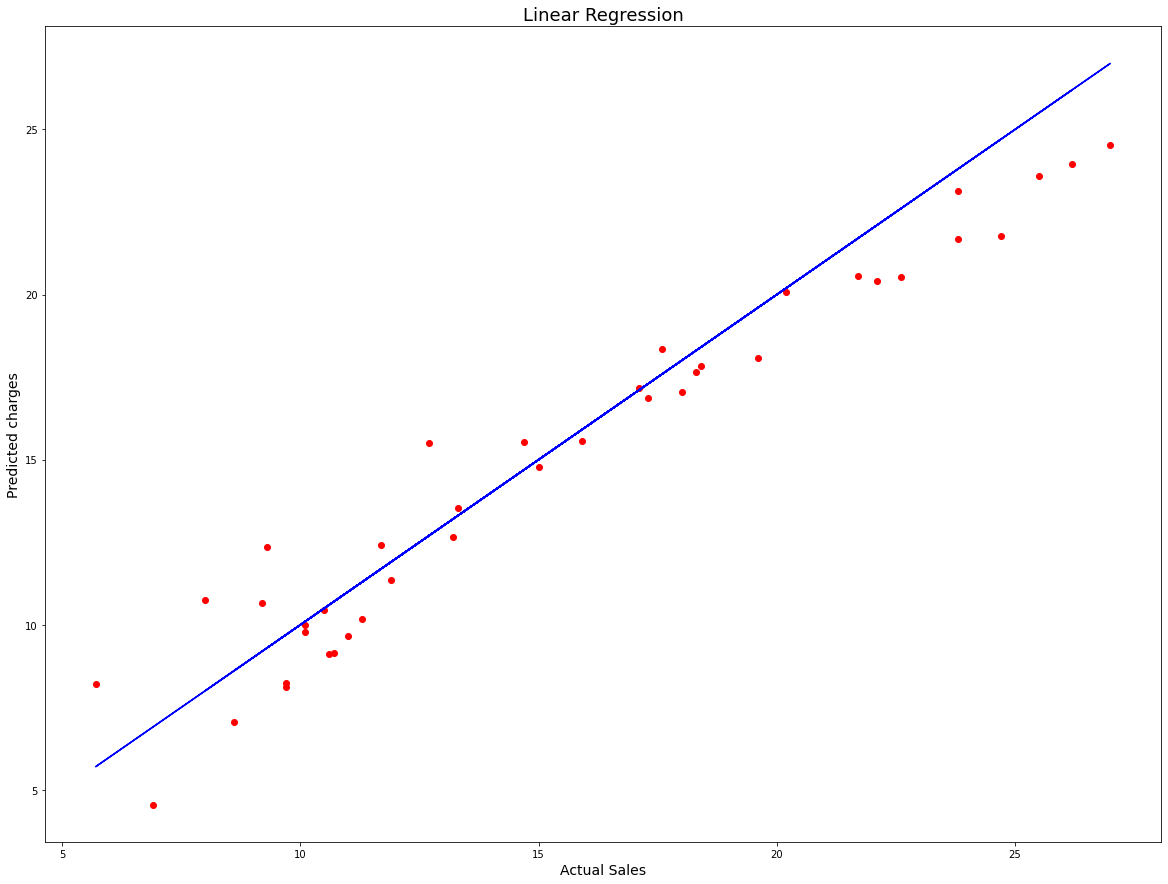

In [59]:
plt.figure(figsize=(20,15))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [61]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

Tuning parameter for better results

Linear Regression

In [62]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1.55910533603371
R2 Score is: 93.08514560867515
Cross Validation Score is: 88.65340711347679
R2 Score - Cross Validation Score is 4.43173849519836


L1 -- Lasso Regression

In [63]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1.55915193928126
R2 Score is: 93.08473221840602
Cross Validation Score is: 88.65363616365156
R2 Score - Cross Validation Score is 4.431096054754462


L2 -- Ridge Regression

In [64]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1.5591065320161197
R2 Score is: 93.08513499996616
Cross Validation Score is: 88.6534079856434
R2 Score - Cross Validation Score is 4.43172701432276


Support Vector Regression

In [65]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 2.2384265139588995
R2 Score is: 85.74662188425226
Cross Validation Score is: 89.72383913388425
R2 Score - Cross Validation Score is -3.977217249631991


In [66]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 2.3889751767011314
R2 Score is: 83.76488393148054
Cross Validation Score is: 75.89374973053775
R2 Score - Cross Validation Score is 7.871134200942791


In [67]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 1.530683736379888
R2 Score is: 93.33495541011429
Cross Validation Score is: 87.81233391537187
R2 Score - Cross Validation Score is 5.522621494742424


Decision Tree Regressor

In [68]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 1.4421338356754552
R2 Score is: 94.0837944219903
Cross Validation Score is: 95.20677259356403
R2 Score - Cross Validation Score is -1.1229781715737204


Random Forest Regressor

In [69]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.9723140696297625
R2 Score is: 97.3106627711261
Cross Validation Score is: 97.48292302756482
R2 Score - Cross Validation Score is -0.17226025643871878


K Neighbors Regressor

In [70]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.2017903311310172
R2 Score is: 95.89144093457416
Cross Validation Score is: 93.16244923714243
R2 Score - Cross Validation Score is 2.728991697431738


SGD Regressor

In [71]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 32195916605.78615
R2 Score is: -2.9487211934584264e+21
Cross Validation Score is: -5.034635368245383e+24
R2 Score - Cross Validation Score is 5.031686647051925e+24


Gradient Boosting Regressor

In [72]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.8481938414815041
R2 Score is: 97.95345002940957
Cross Validation Score is: 97.74341132578861
R2 Score - Cross Validation Score is 0.21003870362095256


# Hypertuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
RandomForestRegressor().get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [75]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [76]:
GCV = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [77]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [78]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

0.9756137887273133
0.8572593062500093


In [79]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for Random forest model after hypertuning is :', cvs.mean())

Cross Validation Score for Random forest model after hypertuning is : 0.9759369422241158
